C:\Users\46737\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


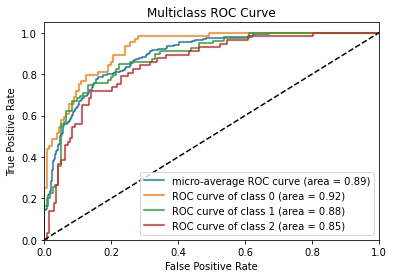

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc

# Generate some random data
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=3, random_state=42)

# Binarize the output labels
y_bin = label_binarize(y, classes=[0, 1, 2])

# Split the data into training and testing sets
X_train, X_test = X[:800], X[800:]
y_train, y_test = y_bin[:800], y_bin[800:]

# Create and train the ANN classifier
clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', random_state=42)
clf.fit(X_train, y_train)

# Predict the probabilities for each class
y_scores = clf.predict_proba(X_test)

# Compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_scores.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curves for each class
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
for i in range(y_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [5]:
!pip install tensorflow
!pip install keras

  Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0


In [6]:
!pip install theano


In [7]:
#MLP
from sklearn.preprocessing import label_binarize
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import theano
import keras
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve

churn_data_encoded = pd.read_csv("ogithreeCat.csv")
X = churn_data_encoded.drop(['lastFUBGrade'],axis=1)
y = churn_data_encoded.lastFUBGrade
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
input_shape = X_train.shape[1]
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

smtom = SMOTETomek(random_state=139)
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)



from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X_train_smtom, y_train_smtom)
ypred=clf.predict(X_test)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(y_test,ypred)

Iteration 1, loss = 1.43111401
Iteration 2, loss = 1.29673473
Iteration 3, loss = 1.19663354
Iteration 4, loss = 1.12707804
Iteration 5, loss = 1.06781525
Iteration 6, loss = 1.01607612
Iteration 7, loss = 0.96787878
Iteration 8, loss = 0.92349768
Iteration 9, loss = 0.88195120
Iteration 10, loss = 0.84174376
Iteration 11, loss = 0.80759453
Iteration 12, loss = 0.77409543
Iteration 13, loss = 0.74584586
Iteration 14, loss = 0.71776885
Iteration 15, loss = 0.69566132
Iteration 16, loss = 0.67668049
Iteration 17, loss = 0.66149941
Iteration 18, loss = 0.64451370
Iteration 19, loss = 0.62958016
Iteration 20, loss = 0.61953190
Iteration 21, loss = 0.60837827
Iteration 22, loss = 0.60065445
Iteration 23, loss = 0.59358425
Iteration 24, loss = 0.58724997
Iteration 25, loss = 0.58061820
Iteration 26, loss = 0.57432821
Iteration 27, loss = 0.56788863
Iteration 28, loss = 0.56162066
Iteration 29, loss = 0.55479912
Iteration 30, loss = 0.54821052
Iteration 31, loss = 0.54108331
Iteration 32, los

C:\Users\46737\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.66

In [8]:
from sklearn.preprocessing import label_binarize
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import theano
import keras
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

churn_data_encoded = pd.read_csv("ogithreeCat.csv")
X = churn_data_encoded.drop(['lastFUBGrade'],axis=1)
y = churn_data_encoded.lastFUBGrade
X = np.array(X)
nsp_classes = y.unique()

# label encoder y
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
y = np_utils.to_categorical(y)
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
X=Scaler.fit_transform(X)
from sklearn.model_selection import train_test_split
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # input shape is (features,)
model.add(Dense(3, activation='softmax'))
model.summary()

# compile the model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])
import keras
from keras.callbacks import EarlyStopping

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=10, 
                                   restore_best_weights=True) # important - otherwise you just return the last weigths...

# now we just update our model fit call


history=model.fit(X_train, y_train,
                    callbacks=[es],
                    epochs=8000000, # you can set this to a big number!
                    batch_size=10,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1)
y_pred = model.predict(X_test)
history_dict = history.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

preds = model.predict(X) # see how the model did!
print(preds[0]) # i'm spreading that prediction across three nodes and they sum to 1
print(np.sum(preds[0])) # sum it up! Should be 1
## [9.9999988e-01 1.3509347e-07 6.7064638e-16]
## 1.0

# Almost a perfect prediction
# actual is left, predicted is top
# names can be found by inspecting Y
matrix = confusion_matrix(y.argmax(axis=1), preds.argmax(axis=1))
matrix
## array([[50,  0,  0],
##        [ 0, 46,  4],
##        [ 0,  1, 49]])


# more detail on how well things were predicted
print(classification_report(y.argmax(axis=1), preds.argmax(axis=1)))

from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other


n_classes = 3 # number of class


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i], )
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2 # line_width
plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
for i in range(y_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve for ANN classification')
plt.legend(loc="lower right")
plt.show()









AttributeError: module 'tensorflow.compat.v2.__internal__.tracking' has no attribute 'TrackableSaver'

In [ ]:
#with smotomek

from sklearn.preprocessing import label_binarize
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import theano
import keras
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

churn_data_encoded = pd.read_csv("ogithreeCat.csv")
X = churn_data_encoded.drop(['lastFUBGrade'],axis=1)
Y = churn_data_encoded.lastFUBGrade
X = np.array(X)

encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # input shape is (features,)
model.add(Dense(3, activation='softmax'))
model.summary()

# compile the model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])
import keras
from keras.callbacks import EarlyStopping

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=10, 
                                   restore_best_weights=True) # important - otherwise you just return the last weigths...

# now we just update our model fit call

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

smtom = SMOTETomek(random_state=139)
X_train_smtom, y_train_smtom = smtom.fit_resample(X, dummy_y)

history = model.fit(X_train_smtom, y_train_smtom,
                    callbacks=[es],
                    epochs=8000000, # you can set this to a big number!
                    batch_size=10,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1)
history_dict = history.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

preds = model.predict(X) # see how the model did!
print(preds[0]) # i'm spreading that prediction across three nodes and they sum to 1
print(np.sum(preds[0])) # sum it up! Should be 1
## [9.9999988e-01 1.3509347e-07 6.7064638e-16]
## 1.0

# Almost a perfect prediction
# actual is left, predicted is top
# names can be found by inspecting Y
matrix = confusion_matrix(dummy_y.argmax(axis=1), preds.argmax(axis=1))
matrix
## array([[50,  0,  0],
##        [ 0, 46,  4],
##        [ 0,  1, 49]])


# more detail on how well things were predicted
print(classification_report(dummy_y.argmax(axis=1), preds.argmax(axis=1)))

In [ ]:
from keras.layers import Activation, Dense
from keras.models import Sequential
from sklearn.preprocessing import label_binarize
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import theano
import keras
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

churn_data_encoded = pd.read_csv("ogithreeCat.csv")
X = churn_data_encoded.drop(['lastFUBGrade'],axis=1)
y = churn_data_encoded.lastFUBGrade
X = np.array(X)
nsp_classes = y.unique()

# label encoder y
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
y = np_utils.to_categorical(y)
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
X=Scaler.fit_transform(X)
from sklearn.model_selection import train_test_split
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # input shape is (features,)
model.add(Dense(3, activation='softmax'))
model.summary()

# compile the model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])
import keras
from keras.callbacks import EarlyStopping

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=10, 
                                   restore_best_weights=True) # important - otherwise you just return the last weigths...

# now we just update our model fit call

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

smtom = SMOTETomek(random_state=139)
X_train_smtom, y_train_smtom = smtom.fit_resample(X, y)

history=model.fit(X_train_smtom, y_train_smtom,
                    callbacks=[es],
                    epochs=8000000, # you can set this to a big number!
                    batch_size=10,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1)
y_pred = model.predict(X_test)
history_dict = history.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

preds = model.predict(X) # see how the model did!
print(preds[0]) # i'm spreading that prediction across three nodes and they sum to 1
print(np.sum(preds[0])) # sum it up! Should be 1
## [9.9999988e-01 1.3509347e-07 6.7064638e-16]
## 1.0

# Almost a perfect prediction
# actual is left, predicted is top
# names can be found by inspecting Y
matrix = confusion_matrix(y.argmax(axis=1), preds.argmax(axis=1))
print('matttttttttttttttt',matrix)
## array([[50,  0,  0],
##        [ 0, 46,  4],
##        [ 0,  1, 49]])


# more detail on how well things were predicted
print(classification_report(y.argmax(axis=1), preds.argmax(axis=1)))

from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other


n_classes = 3 # number of class


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i], )
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2 # line_width
ax=plt.axes()

# Set color

plt.style.use('default')
plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve for ANN classification')
plt.legend(loc="lower right")
plt.show()





In [ ]:
!pip install keras>=2.9.0